# 1.

In [11]:
%cd /content/first_assignment_audio_processing
!git pull

/content/first_assignment_audio_processing
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 101 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (101/101), 2.56 MiB | 15.04 MiB/s, done.
Resolving deltas: 100% (4/4), done.
From https://github.com/omertalmi5/first_assignment_audio_processing
   8ccf36f..d9b5764  main       -> origin/main
Updating 8ccf36f..d9b5764
Fast-forward
 .../Class_Representative/resampled_yaron_0.wav                              | Bin 0 -> 47308 bytes
 .../Class_Representative/resampled_yaron_1.wav                              | Bin 0 -> 39756 bytes
 .../Class_Representative/resampled_yaron_2.wav                              | Bin 0 -> 36876 bytes
 .../Class_Representative/resampled_yaron_3.wav                              | Bin 0 -> 38828 bytes
 .../Class_Representative/resampled_yaron_4.wav                              | Bin 0 -> 37

In [3]:
!git clone https://github.com/omertalmi5/first_assignment_audio_processing.git

Cloning into 'first_assignment_audio_processing'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 136 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (136/136), 11.12 MiB | 12.50 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [5]:
# First, install required packages if not already installed
!pip install librosa soundfile

import os
import librosa
import soundfile as sf
from tqdm.notebook import tqdm
import numpy as np

def resample_audio_files(input_directory, output_directory, target_sr=16000):
    """
    Resample all audio files in the input directory to the target sampling rate.

    Parameters:
    -----------
    input_directory : str
        Path to the directory containing the original audio files
    output_directory : str
        Path to save the resampled audio files
    target_sr : int
        Target sampling rate in Hz (default: 16000)
    """

    # Create output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Get list of audio files
    audio_files = [f for f in os.listdir(input_directory)
                   if f.endswith('.wav')]

    for audio_file in tqdm(audio_files):
        try:
            # Load the audio file
            audio_path = os.path.join(input_directory, audio_file)
            y, sampling_rate = librosa.load(audio_path, sr=None)

            if sampling_rate != target_sr:
                y = librosa.resample(y, orig_sr=sampling_rate, target_sr=target_sr)

            output_path = os.path.join(output_directory, f"resampled_{audio_file}")
            sf.write(output_path, y, target_sr)

        except Exception as e:
            print(f"Error processing {audio_file}: {str(e)}")

# Example usage:
input_dir = "/content/first_assignment_audio_processing/Second_Assignment/Recordings"
output_dir = "/content/resampled_recordings"

resample_audio_files(input_dir, output_dir)

  0%|          | 0/90 [00:00<?, ?it/s]

In [9]:
!zip -r /content/resampled_recordings.zip /content/resampled_recordings



  adding: content/resampled_recordings/ (stored 0%)
  adding: content/resampled_recordings/resampled_avital_0.wav (deflated 32%)
  adding: content/resampled_recordings/resampled_bar_2.wav (deflated 41%)
  adding: content/resampled_recordings/resampled_bar_5.wav (deflated 36%)
  adding: content/resampled_recordings/resampled_bar_7.wav (deflated 33%)
  adding: content/resampled_recordings/resampled_roni_6.wav (deflated 37%)
  adding: content/resampled_recordings/resampled_ohad_8.wav (deflated 20%)
  adding: content/resampled_recordings/resampled_neta_1.wav (deflated 41%)
  adding: content/resampled_recordings/resampled_ohad_3.wav (deflated 20%)
  adding: content/resampled_recordings/resampled_roni_1.wav (deflated 35%)
  adding: content/resampled_recordings/resampled_rom_8.wav (deflated 22%)
  adding: content/resampled_recordings/resampled_avital_3.wav (deflated 36%)
  adding: content/resampled_recordings/resampled_yaron_1.wav (deflated 29%)
  adding: content/resampled_recordings/resample

# 2.

  0%|          | 0/90 [00:00<?, ?it/s]

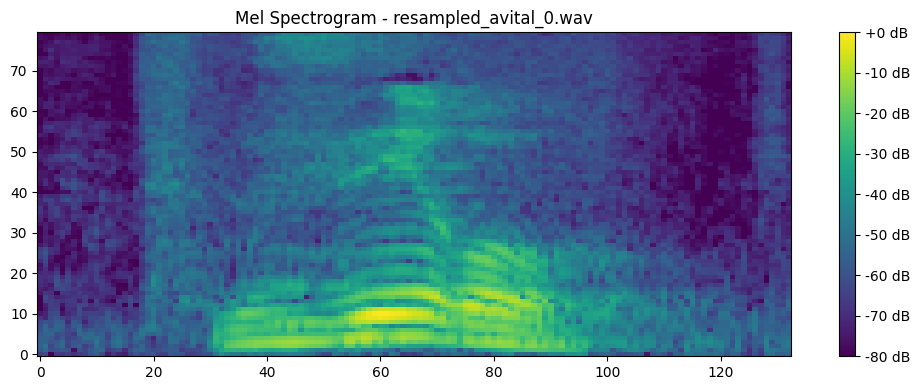

In [12]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

def compute_mel_spectrogram(audio_path, sr=16000):
    """
    Compute Mel spectrogram with 25ms window, 10ms hop, and 80 mel bands
    """
    # Load audio
    y, _ = librosa.load(audio_path, sr=sr)

    # Convert parameters to samples
    n_fft = int(0.025 * sr)  # 25ms window
    hop_length = int(0.010 * sr)  # 10ms hop

    # Compute mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=80  # 80 mel bands
    )

    # Convert to log scale
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    return mel_spec_db

def process_directory(input_dir):
    """Process all audio files in directory"""
    spectrograms = {}

    for filename in tqdm(os.listdir(input_dir)):
        if filename.endswith('.wav'):
            path = os.path.join(input_dir, filename)
            spectrograms[filename] = compute_mel_spectrogram(path)

    return spectrograms

# Example usage
input_dir = "/content/first_assignment_audio_processing/Second_Assignment/resampled_recordings"
spectrograms = process_directory(input_dir)

# Display sample spectrogram
plt.figure(figsize=(10, 4))
sample_file = list(spectrograms.keys())[0]
plt.imshow(spectrograms[sample_file], aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram - {sample_file}')
plt.tight_layout()
plt.show()